## Setup schematic:

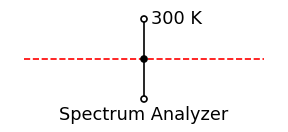

## Total noise power at 300K without attenuation = -43.706995 dBm

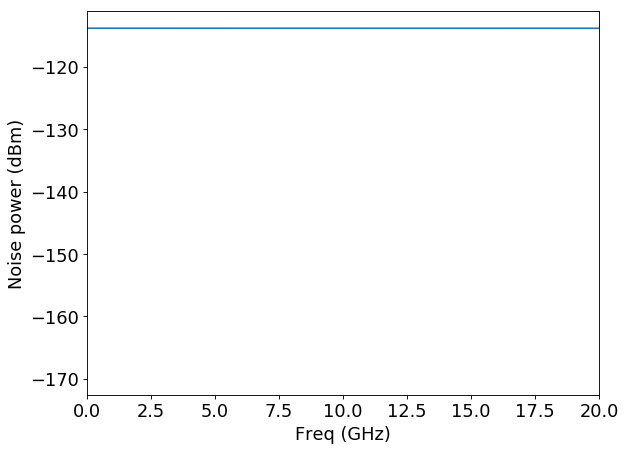

In [7]:
%matplotlib inline
import thermcalc as tc
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


source = tc.ThermSource(300)
analyzer = tc.SpecAnalyzer()
analyzer.port[0].connect(source.port[0])

printmd('## Setup schematic:')
tc.draw(source)
plt.show()
Noise = tc.evaluate(source)
printmd("## Total noise power at 300K without attenuation = {:f} dBm".format(Noise.total_power_dbm()))
Noise.dbm_plot(bandwidth=1E6)
plt.show()

## Setup schematic:

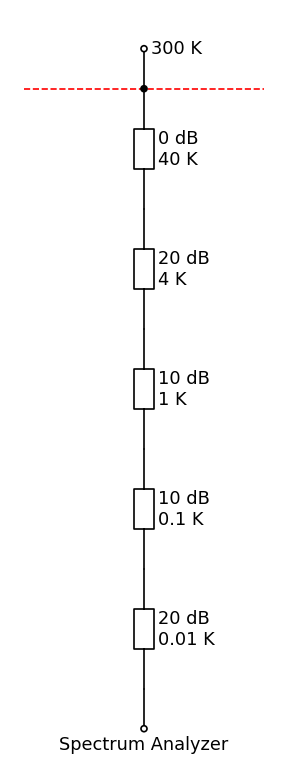

## Total noise power after attenuation = -103.579888 dBm

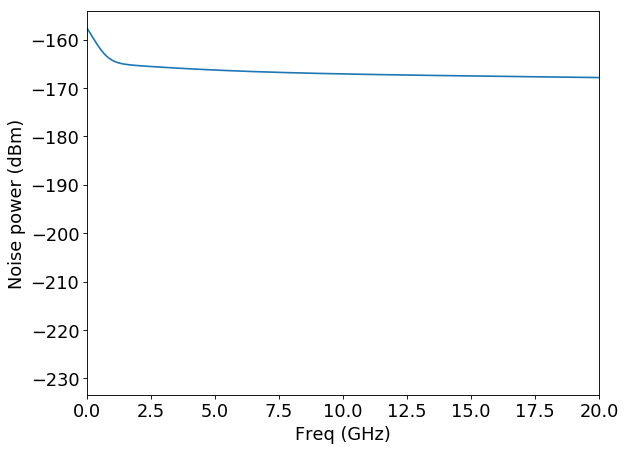

In [8]:
source = tc.ThermSource(300)
atten1 = tc.Attenuator(0, 40)
atten2 = tc.Attenuator(20, 4)
atten3 = tc.Attenuator(10, 1)
atten4 = tc.Attenuator(10, 0.1)
atten5 = tc.Attenuator(20, 0.01)
analyzer = tc.SpecAnalyzer()

atten1.port[0].connect(source.port[0])
atten2.port[0].connect(atten1.port[1])
atten3.port[0].connect(atten2.port[1])
atten4.port[0].connect(atten3.port[1])
atten5.port[0].connect(atten4.port[1])
analyzer.port[0].connect(atten5.port[1])

printmd('## Setup schematic:')
tc.draw(source)
plt.show()
Noise = tc.evaluate(source)
printmd("## Total noise power after attenuation = {:f} dBm".format(Noise.total_power_dbm()))
Noise.dbm_plot(bandwidth=1E6)
plt.show()
